In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
df_monday = pd.read_csv('data/monday.csv', sep=';', index_col=0)

df_tuesday = pd.read_csv('data/tuesday.csv', sep=';', index_col=0)

df_wednesday = pd.read_csv('data/wednesday.csv', sep=';', index_col=0)

df_thursday = pd.read_csv('data/thursday.csv', sep=';', index_col=0)

df_friday = pd.read_csv('data/friday.csv', sep=';', index_col=0)

In [3]:
# put together every dataframe for each day into one df
frames = [df_monday, df_tuesday, df_wednesday, df_thursday, df_friday]
df = pd.concat(frames)
df.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices


In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
# Calculate the total number of customers in each section
df.groupby('location').count()

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


<AxesSubplot:xlabel='location'>

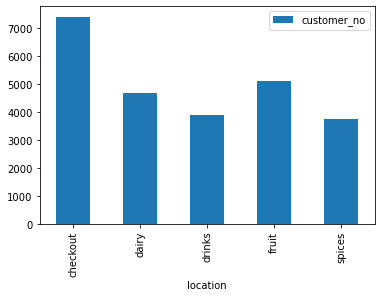

In [6]:
df.groupby('location').count().plot(kind='bar')

In [7]:
df['day'] = df.index.day
df.head()

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,2
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:04:00,3,dairy,2
2019-09-02 07:04:00,4,dairy,2
2019-09-02 07:04:00,5,spices,2


In [8]:
df.index

DatetimeIndex(['2019-09-02 07:03:00', '2019-09-02 07:03:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:05:00', '2019-09-02 07:05:00',
               ...
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=24877, freq=None)

In [9]:
# Calculate the total number of customers in each section over time (here complete time)
df.groupby(['location', 'day']).count()
df.head(6)

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,2
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:04:00,3,dairy,2
2019-09-02 07:04:00,4,dairy,2
2019-09-02 07:04:00,5,spices,2
2019-09-02 07:04:00,6,spices,2


In [10]:
# Calculate the total number of customers in each section over time (here hourly)
df.groupby('location').resample('h').count()

customer_no  location  day
location timestamp                                      
checkout 2019-09-02 07:00:00           92        92   92
         2019-09-02 08:00:00          112       112  112
         2019-09-02 09:00:00           85        85   85
         2019-09-02 10:00:00           90        90   90
         2019-09-02 11:00:00           55        55   55
...                                   ...       ...  ...
spices   2019-09-06 17:00:00           65        65   65
         2019-09-06 18:00:00           98        98   98
         2019-09-06 19:00:00           65        65   65
         2019-09-06 20:00:00           54        54   54
         2019-09-06 21:00:00           20        20   20

[555 rows x 3 columns]

In [11]:
# Display the number of customers at checkout over time (here one day)
df[(df.location == 'checkout') & (df.day==2)].count()

customer_no    1437
location       1437
day            1437
dtype: int64

In [12]:
# Calculate the total number of customers in each section over time (here day)
df.groupby(['location', 'day']).count()
df.head(7)

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,2
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:04:00,3,dairy,2
2019-09-02 07:04:00,4,dairy,2
2019-09-02 07:04:00,5,spices,2
2019-09-02 07:04:00,6,spices,2
2019-09-02 07:04:00,7,spices,2


<AxesSubplot:xlabel='location,day'>

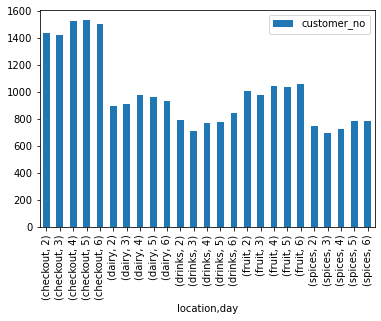

In [13]:
df.groupby(['location', 'day']).count().plot(kind='bar')

In [14]:
df.reset_index(inplace=True)
df

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,2
1,2019-09-02 07:03:00,2,dairy,2
2,2019-09-02 07:04:00,3,dairy,2
3,2019-09-02 07:04:00,4,dairy,2
4,2019-09-02 07:04:00,5,spices,2
...,...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy,6
24873,2019-09-06 21:50:00,1507,checkout,6
24874,2019-09-06 21:50:00,1508,checkout,6
24875,2019-09-06 21:50:00,1509,drinks,6


In [15]:
df[df.location == 'checkout'].groupby(['day', 'timestamp'])[['customer_no']].count()

customer_no
day timestamp                       
2   2019-09-02 07:05:00            2
    2019-09-02 07:06:00            2
    2019-09-02 07:07:00            1
    2019-09-02 07:08:00            3
    2019-09-02 07:09:00            1
...                              ...
6   2019-09-06 21:37:00            1
    2019-09-06 21:45:00            1
    2019-09-06 21:47:00            2
    2019-09-06 21:48:00            2
    2019-09-06 21:50:00            2

[3460 rows x 1 columns]

In [16]:
# create new column 'time_spend'
df['time_spend'] = df.groupby(['day', 'customer_no'])['timestamp'].transform(lambda x : x.max()-x.min())

In [17]:
# find customers who were not checked-out
df[df['time_spend'] == 0]

,timestamp,customer_no,location,day,time_spend


In [18]:
# Calculate the time each customer spent in the market
df['time_spend']

0       0 days 00:02:00
1       0 days 00:03:00
2       0 days 00:02:00
3       0 days 00:04:00
4       0 days 00:01:00
              ...      
24872   0 days 00:09:00
24873   0 days 00:02:00
24874   0 days 00:02:00
24875   0 days 00:00:00
24876   0 days 00:00:00
Name: time_spend, Length: 24877, dtype: timedelta64[ns]

In [20]:
df = df.set_index(['timestamp'])
df = df.groupby('customer_no').resample('T').ffill()

In [21]:
df

customer_no  location  day      time_spend
customer_no timestamp                                                      
1           2019-09-02 07:03:00            1     dairy    2 0 days 00:02:00
            2019-09-02 07:04:00            1     dairy    2 0 days 00:02:00
            2019-09-02 07:05:00            1  checkout    2 0 days 00:02:00
            2019-09-02 07:06:00            1  checkout    2 0 days 00:02:00
            2019-09-02 07:07:00            1  checkout    2 0 days 00:02:00
...                                      ...       ...  ...             ...
1533        2019-09-05 21:48:00         1533     dairy    5 0 days 00:00:00
1534        2019-09-05 21:48:00         1534     fruit    5 0 days 00:01:00
            2019-09-05 21:49:00         1534  checkout    5 0 days 00:01:00
1535        2019-09-05 21:48:00         1535    spices    5 0 days 00:01:00
            2019-09-05 21:49:00         1535  checkout    5 0 days 00:01:00

[8526802 rows x 4 columns]

In [23]:
# create a new column 'next location'
df.drop(columns='customer_no', inplace=True)

df['next_location'] = df.groupby(['day', 'customer_no'])['location'].shift(-1)


In [24]:
df.head(10)

location  day      time_spend next_location
customer_no timestamp                                                       
1           2019-09-02 07:03:00     dairy    2 0 days 00:02:00         dairy
            2019-09-02 07:04:00     dairy    2 0 days 00:02:00      checkout
            2019-09-02 07:05:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:06:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:07:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:08:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:09:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:10:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:11:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:12:00  checkout    2 0 days 00:02:00      checkout

In [25]:
df.next_location.fillna('checkout', inplace=True)

In [26]:
df.head(10)

location  day      time_spend next_location
customer_no timestamp                                                       
1           2019-09-02 07:03:00     dairy    2 0 days 00:02:00         dairy
            2019-09-02 07:04:00     dairy    2 0 days 00:02:00      checkout
            2019-09-02 07:05:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:06:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:07:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:08:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:09:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:10:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:11:00  checkout    2 0 days 00:02:00      checkout
            2019-09-02 07:12:00  checkout    2 0 days 00:02:00      checkout

In [27]:
transition_probes = pd.crosstab(df['location'], df['next_location'], normalize=0)

In [28]:
transition_probes

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.053250,0.864514,0.030143,0.025655,0.026437
drinks,0.215710,0.010899,0.598499,0.087909,0.086983
fruit,0.095683,0.045526,0.026031,0.808709,0.024051
spices,0.071016,0.091059,0.076871,0.042865,0.718189


In [29]:
# all rows have to sum up to one
assert all(transition_probes.sum(axis=1) > 0.999)

In [33]:
class Customer:
       
    def __init__(self, name, state, transition_probes, budget=100):
        
        self.name = name
        self.state = state
        self.transition_probes = transition_probes
        self.budget = budget
        
    def __repr__(self):
        
        return f'<Customer {self.name} in {self.state}>'
    
    def next_state(self):
        
        '''
        Propagates the customer to the next state.
        Returns nothing.
        '''
        
        self.state = random.choices(transition_probes.columns, transition_probes.loc[self.state])[0]
        return self.state
        
        
    def is_active(self):
        
        return self.state != 'checkout'
            #return True

In [60]:
class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self, name):        
        # a list of Customer objects                  
        self.customers = []
        self.minutes = 0
        self.last_id = 0
        self.name = name
        # opens at 0
        # closes at 15


    def __repr__(self):
        return f'{self.name} supermarket at {self.get_time()} with {len(self.customers)} customers.'


    def get_time(self):
        """current time in HH:MM format,
        """
        hours = self.minutes // 60  # integer division
        minutes = self.minutes % 60 # remainder/ modulo
        return f'{hours:02d}:{minutes:02d}:00'


    def is_open(self):  
        # supermarket closes after 15hours    
        return self.minutes < 900


    def print_customers(self):
        """print all customers with the current time and id in CSV format.     
        """
        
        for customer in self.customers:
            
            print(f'{self.get_time()}, {customer.name}, {customer.state}')


    def next_minute(self):
        """propagates all customers to the next state.
        """
        self.minutes += 1
        # for every customer determine their next state
        for customer in self.customers:
            customer.next_state()
   

    def add_new_customers(self):
        """randomly creates new customers.
        """
        self.last_id += 1
        new_customer = Customer(self.last_id, random.choices(['fruit', 'dairy', 'drinks', 'spices'])[0], transition_probes)
        self.customers.append(new_customer)
        


    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
        self.customers = [customer for customer in self.customers if customer.is_active()]
        
        #for customer in self.customers if 
                

In [63]:
lidl = Supermarket(name='LIDL')

while lidl.is_open():
    
    lidl.get_time()

    # increase the time of the supermarket by one minute
    lidl.add_new_customers()
    

    lidl.next_minute()
    

    # remove churned customers from the supermarket
    lidl.print_customers()
    
    lidl.remove_exitsting_customers()

    # generate new customers at their initial location
    #lidl.add_new_customers()
    

    # repeat from step 1
    #lidl.print_customers()

00:01:00, 1, fruit
00:02:00, 1, fruit
00:02:00, 2, spices
00:03:00, 1, fruit
00:03:00, 2, spices
00:03:00, 3, fruit
00:04:00, 1, fruit
00:04:00, 2, fruit
00:04:00, 3, fruit
00:04:00, 4, dairy
00:05:00, 1, fruit
00:05:00, 2, fruit
00:05:00, 3, drinks
00:05:00, 4, dairy
00:05:00, 5, dairy
00:06:00, 1, fruit
00:06:00, 2, fruit
00:06:00, 3, drinks
00:06:00, 4, dairy
00:06:00, 5, dairy
00:06:00, 6, checkout
00:07:00, 1, fruit
00:07:00, 2, fruit
00:07:00, 3, fruit
00:07:00, 4, fruit
00:07:00, 5, dairy
00:07:00, 7, dairy
00:08:00, 1, fruit
00:08:00, 2, fruit
00:08:00, 3, spices
00:08:00, 4, fruit
00:08:00, 5, spices
00:08:00, 7, dairy
00:08:00, 8, dairy
00:09:00, 1, checkout
00:09:00, 2, fruit
00:09:00, 3, dairy
00:09:00, 4, fruit
00:09:00, 5, spices
00:09:00, 7, dairy
00:09:00, 8, dairy
00:09:00, 9, fruit
00:10:00, 2, fruit
00:10:00, 3, spices
00:10:00, 4, fruit
00:10:00, 5, drinks
00:10:00, 7, dairy
00:10:00, 8, dairy
00:10:00, 9, fruit
00:10:00, 10, dairy
00:11:00, 2, fruit
00:11:00, 3, sp

01:32:00, 68, fruit
01:32:00, 75, spices
01:32:00, 79, fruit
01:32:00, 81, fruit
01:32:00, 82, fruit
01:32:00, 83, fruit
01:32:00, 86, spices
01:32:00, 88, spices
01:32:00, 89, drinks
01:32:00, 90, dairy
01:32:00, 91, dairy
01:32:00, 92, spices
01:33:00, 66, dairy
01:33:00, 68, drinks
01:33:00, 75, drinks
01:33:00, 79, fruit
01:33:00, 81, fruit
01:33:00, 82, fruit
01:33:00, 83, fruit
01:33:00, 86, spices
01:33:00, 88, spices
01:33:00, 89, checkout
01:33:00, 90, dairy
01:33:00, 91, dairy
01:33:00, 92, spices
01:33:00, 93, fruit
01:34:00, 66, dairy
01:34:00, 68, checkout
01:34:00, 75, drinks
01:34:00, 79, fruit
01:34:00, 81, dairy
01:34:00, 82, spices
01:34:00, 83, fruit
01:34:00, 86, drinks
01:34:00, 88, drinks
01:34:00, 90, dairy
01:34:00, 91, dairy
01:34:00, 92, spices
01:34:00, 93, fruit
01:34:00, 94, dairy
01:35:00, 66, checkout
01:35:00, 75, drinks
01:35:00, 79, fruit
01:35:00, 81, dairy
01:35:00, 82, spices
01:35:00, 83, fruit
01:35:00, 86, drinks
01:35:00, 88, drinks
01:35:00, 90

02:54:00, 159, dairy
02:54:00, 160, dairy
02:54:00, 161, dairy
02:54:00, 162, spices
02:54:00, 168, drinks
02:54:00, 169, fruit
02:54:00, 170, spices
02:54:00, 172, drinks
02:54:00, 173, checkout
02:54:00, 174, fruit
02:55:00, 132, dairy
02:55:00, 134, fruit
02:55:00, 146, spices
02:55:00, 159, drinks
02:55:00, 160, drinks
02:55:00, 161, fruit
02:55:00, 162, spices
02:55:00, 168, drinks
02:55:00, 169, fruit
02:55:00, 170, spices
02:55:00, 172, checkout
02:55:00, 174, fruit
02:55:00, 175, dairy
02:56:00, 132, drinks
02:56:00, 134, fruit
02:56:00, 146, spices
02:56:00, 159, drinks
02:56:00, 160, drinks
02:56:00, 161, fruit
02:56:00, 162, spices
02:56:00, 168, drinks
02:56:00, 169, fruit
02:56:00, 170, spices
02:56:00, 174, fruit
02:56:00, 175, dairy
02:56:00, 176, drinks
02:57:00, 132, checkout
02:57:00, 134, fruit
02:57:00, 146, spices
02:57:00, 159, drinks
02:57:00, 160, fruit
02:57:00, 161, fruit
02:57:00, 162, spices
02:57:00, 168, drinks
02:57:00, 169, dairy
02:57:00, 170, spices
02

04:23:00, 253, dairy
04:23:00, 255, dairy
04:23:00, 257, drinks
04:23:00, 258, drinks
04:23:00, 260, spices
04:23:00, 261, fruit
04:23:00, 262, spices
04:23:00, 263, fruit
04:24:00, 234, dairy
04:24:00, 238, fruit
04:24:00, 243, dairy
04:24:00, 248, fruit
04:24:00, 253, dairy
04:24:00, 255, dairy
04:24:00, 257, drinks
04:24:00, 258, drinks
04:24:00, 260, drinks
04:24:00, 261, fruit
04:24:00, 262, checkout
04:24:00, 263, checkout
04:24:00, 264, dairy
04:25:00, 234, dairy
04:25:00, 238, fruit
04:25:00, 243, dairy
04:25:00, 248, fruit
04:25:00, 253, dairy
04:25:00, 255, dairy
04:25:00, 257, checkout
04:25:00, 258, drinks
04:25:00, 260, spices
04:25:00, 261, fruit
04:25:00, 264, dairy
04:25:00, 265, dairy
04:26:00, 234, dairy
04:26:00, 238, fruit
04:26:00, 243, dairy
04:26:00, 248, fruit
04:26:00, 253, dairy
04:26:00, 255, dairy
04:26:00, 258, drinks
04:26:00, 260, spices
04:26:00, 261, fruit
04:26:00, 264, dairy
04:26:00, 265, checkout
04:26:00, 266, dairy
04:27:00, 234, dairy
04:27:00, 2

05:48:00, 318, fruit
05:48:00, 319, dairy
05:48:00, 322, spices
05:48:00, 328, spices
05:48:00, 341, fruit
05:48:00, 342, spices
05:48:00, 343, dairy
05:48:00, 345, fruit
05:48:00, 346, dairy
05:48:00, 347, drinks
05:48:00, 348, drinks
05:49:00, 316, fruit
05:49:00, 318, fruit
05:49:00, 319, dairy
05:49:00, 322, spices
05:49:00, 328, spices
05:49:00, 341, fruit
05:49:00, 342, drinks
05:49:00, 343, dairy
05:49:00, 345, fruit
05:49:00, 346, fruit
05:49:00, 347, drinks
05:49:00, 348, checkout
05:49:00, 349, spices
05:50:00, 316, fruit
05:50:00, 318, fruit
05:50:00, 319, drinks
05:50:00, 322, drinks
05:50:00, 328, spices
05:50:00, 341, fruit
05:50:00, 342, drinks
05:50:00, 343, dairy
05:50:00, 345, fruit
05:50:00, 346, dairy
05:50:00, 347, spices
05:50:00, 349, spices
05:50:00, 350, drinks
05:51:00, 316, fruit
05:51:00, 318, fruit
05:51:00, 319, checkout
05:51:00, 322, drinks
05:51:00, 328, dairy
05:51:00, 341, fruit
05:51:00, 342, drinks
05:51:00, 343, spices
05:51:00, 345, fruit
05:51:00

07:08:00, 405, dairy
07:08:00, 410, dairy
07:08:00, 412, fruit
07:08:00, 420, spices
07:08:00, 421, checkout
07:08:00, 423, dairy
07:08:00, 424, spices
07:08:00, 425, dairy
07:08:00, 426, spices
07:08:00, 427, fruit
07:08:00, 428, drinks
07:09:00, 386, dairy
07:09:00, 400, fruit
07:09:00, 405, drinks
07:09:00, 410, dairy
07:09:00, 412, fruit
07:09:00, 420, checkout
07:09:00, 423, dairy
07:09:00, 424, spices
07:09:00, 425, dairy
07:09:00, 426, spices
07:09:00, 427, fruit
07:09:00, 428, drinks
07:09:00, 429, dairy
07:10:00, 386, dairy
07:10:00, 400, fruit
07:10:00, 405, drinks
07:10:00, 410, dairy
07:10:00, 412, fruit
07:10:00, 423, fruit
07:10:00, 424, spices
07:10:00, 425, dairy
07:10:00, 426, spices
07:10:00, 427, fruit
07:10:00, 428, drinks
07:10:00, 429, dairy
07:10:00, 430, spices
07:11:00, 386, dairy
07:11:00, 400, fruit
07:11:00, 405, drinks
07:11:00, 410, dairy
07:11:00, 412, fruit
07:11:00, 423, fruit
07:11:00, 424, spices
07:11:00, 425, dairy
07:11:00, 426, spices
07:11:00, 42

08:47:00, 506, dairy
08:47:00, 512, dairy
08:47:00, 513, spices
08:47:00, 517, dairy
08:47:00, 519, dairy
08:47:00, 521, dairy
08:47:00, 522, drinks
08:47:00, 523, dairy
08:47:00, 524, dairy
08:47:00, 525, dairy
08:47:00, 526, dairy
08:47:00, 527, fruit
08:48:00, 491, fruit
08:48:00, 502, dairy
08:48:00, 506, dairy
08:48:00, 512, dairy
08:48:00, 513, spices
08:48:00, 517, dairy
08:48:00, 519, dairy
08:48:00, 521, dairy
08:48:00, 522, drinks
08:48:00, 523, dairy
08:48:00, 524, dairy
08:48:00, 525, fruit
08:48:00, 526, dairy
08:48:00, 527, checkout
08:48:00, 528, fruit
08:49:00, 491, fruit
08:49:00, 502, dairy
08:49:00, 506, dairy
08:49:00, 512, dairy
08:49:00, 513, drinks
08:49:00, 517, dairy
08:49:00, 519, dairy
08:49:00, 521, dairy
08:49:00, 522, drinks
08:49:00, 523, dairy
08:49:00, 524, dairy
08:49:00, 525, fruit
08:49:00, 526, dairy
08:49:00, 528, fruit
08:49:00, 529, checkout
08:50:00, 491, fruit
08:50:00, 502, dairy
08:50:00, 506, dairy
08:50:00, 512, drinks
08:50:00, 513, drinks

10:10:00, 579, drinks
10:10:00, 590, fruit
10:10:00, 593, dairy
10:10:00, 595, dairy
10:10:00, 598, fruit
10:10:00, 600, fruit
10:10:00, 603, dairy
10:10:00, 604, fruit
10:10:00, 605, dairy
10:10:00, 606, fruit
10:10:00, 607, spices
10:10:00, 608, checkout
10:10:00, 609, dairy
10:10:00, 610, dairy
10:11:00, 579, checkout
10:11:00, 590, fruit
10:11:00, 593, fruit
10:11:00, 595, drinks
10:11:00, 598, fruit
10:11:00, 600, dairy
10:11:00, 603, dairy
10:11:00, 604, fruit
10:11:00, 605, dairy
10:11:00, 606, fruit
10:11:00, 607, dairy
10:11:00, 609, drinks
10:11:00, 610, dairy
10:11:00, 611, fruit
10:12:00, 590, fruit
10:12:00, 593, fruit
10:12:00, 595, drinks
10:12:00, 598, fruit
10:12:00, 600, spices
10:12:00, 603, dairy
10:12:00, 604, fruit
10:12:00, 605, dairy
10:12:00, 606, fruit
10:12:00, 607, dairy
10:12:00, 609, drinks
10:12:00, 610, dairy
10:12:00, 611, fruit
10:12:00, 612, checkout
10:13:00, 590, fruit
10:13:00, 593, dairy
10:13:00, 595, fruit
10:13:00, 598, fruit
10:13:00, 600, che

11:32:00, 690, dairy
11:32:00, 691, spices
11:32:00, 692, spices
11:33:00, 657, spices
11:33:00, 682, fruit
11:33:00, 683, dairy
11:33:00, 685, fruit
11:33:00, 686, drinks
11:33:00, 688, checkout
11:33:00, 689, spices
11:33:00, 690, dairy
11:33:00, 691, spices
11:33:00, 692, spices
11:33:00, 693, dairy
11:34:00, 657, spices
11:34:00, 682, dairy
11:34:00, 683, dairy
11:34:00, 685, fruit
11:34:00, 686, drinks
11:34:00, 689, spices
11:34:00, 690, checkout
11:34:00, 691, fruit
11:34:00, 692, spices
11:34:00, 693, dairy
11:34:00, 694, dairy
11:35:00, 657, spices
11:35:00, 682, dairy
11:35:00, 683, dairy
11:35:00, 685, fruit
11:35:00, 686, drinks
11:35:00, 689, spices
11:35:00, 691, fruit
11:35:00, 692, spices
11:35:00, 693, dairy
11:35:00, 694, dairy
11:35:00, 695, spices
11:36:00, 657, dairy
11:36:00, 682, checkout
11:36:00, 683, checkout
11:36:00, 685, fruit
11:36:00, 686, dairy
11:36:00, 689, spices
11:36:00, 691, fruit
11:36:00, 692, spices
11:36:00, 693, dairy
11:36:00, 694, dairy
11:3

12:38:00, 734, dairy
12:38:00, 736, spices
12:38:00, 743, dairy
12:38:00, 748, drinks
12:38:00, 752, fruit
12:38:00, 754, fruit
12:38:00, 755, dairy
12:38:00, 756, dairy
12:38:00, 757, spices
12:38:00, 758, fruit
12:39:00, 734, dairy
12:39:00, 736, fruit
12:39:00, 743, dairy
12:39:00, 748, drinks
12:39:00, 752, checkout
12:39:00, 754, dairy
12:39:00, 755, dairy
12:39:00, 756, dairy
12:39:00, 757, spices
12:39:00, 758, checkout
12:39:00, 759, dairy
12:40:00, 734, dairy
12:40:00, 736, fruit
12:40:00, 743, checkout
12:40:00, 748, checkout
12:40:00, 754, dairy
12:40:00, 755, dairy
12:40:00, 756, dairy
12:40:00, 757, spices
12:40:00, 759, dairy
12:40:00, 760, drinks
12:41:00, 734, dairy
12:41:00, 736, fruit
12:41:00, 754, dairy
12:41:00, 755, dairy
12:41:00, 756, dairy
12:41:00, 757, spices
12:41:00, 759, dairy
12:41:00, 760, checkout
12:41:00, 761, spices
12:42:00, 734, dairy
12:42:00, 736, fruit
12:42:00, 754, dairy
12:42:00, 755, dairy
12:42:00, 756, dairy
12:42:00, 757, spices
12:42:00,

13:56:00, 814, checkout
13:56:00, 816, fruit
13:56:00, 822, dairy
13:56:00, 828, dairy
13:56:00, 829, fruit
13:56:00, 831, dairy
13:56:00, 832, dairy
13:56:00, 834, fruit
13:56:00, 835, dairy
13:56:00, 836, fruit
13:57:00, 816, drinks
13:57:00, 822, dairy
13:57:00, 828, dairy
13:57:00, 829, fruit
13:57:00, 831, dairy
13:57:00, 832, drinks
13:57:00, 834, dairy
13:57:00, 835, dairy
13:57:00, 836, dairy
13:57:00, 837, fruit
13:58:00, 816, dairy
13:58:00, 822, drinks
13:58:00, 828, dairy
13:58:00, 829, fruit
13:58:00, 831, dairy
13:58:00, 832, drinks
13:58:00, 834, drinks
13:58:00, 835, dairy
13:58:00, 836, dairy
13:58:00, 837, fruit
13:58:00, 838, dairy
13:59:00, 816, dairy
13:59:00, 822, drinks
13:59:00, 828, dairy
13:59:00, 829, fruit
13:59:00, 831, dairy
13:59:00, 832, drinks
13:59:00, 834, drinks
13:59:00, 835, dairy
13:59:00, 836, dairy
13:59:00, 837, fruit
13:59:00, 838, dairy
13:59:00, 839, drinks
14:00:00, 816, dairy
14:00:00, 822, spices
14:00:00, 828, dairy
14:00:00, 829, fruit


In [53]:
cust1 = Customer("Jake", "spices", transition_probes, 50)
cust1.next_state()

'fruit'